# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

### Шаг 1. Откройте файлы с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle

pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('/datasets/hotel_train.csv')
test = pd.read_csv('/datasets/hotel_test.csv')

### Шаг 2. Предобработка и исследовательский анализ данных

#### Анализ и предобработка данных

Выведем первые 5 строк таблиц для первого взгляда на данные и с помощью метода info() изучим структуры таблиц: типы данных, количество строк, столбцов, пропущенных данных.

In [3]:
# с полощью метода info() изучим общую информацию о данных: количество строк и столбцов, типы данных и наличие пропуков
train.info()

# выведем первые 5 строк на экран
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,0.0,0.0,BB,GBR,Direct,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,PRT,Direct,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,0.0,0.0,FB,PRT,Direct,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,3


In [4]:
# с полощью метода info() изучим общую информацию о данных: количество строк и столбцов, типы данных и наличие пропуков
test.info()

# выведем первые 5 строк на экран
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,0.0,0.0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7


**Каждый из даиасетов содержит следующие столбцы:**
- id — номер записи;
- adults — количество взрослых постояльцев;
- arrival_date_year — год заезда;
- arrival_date_month — месяц заезда;
- arrival_date_week_number — неделя заезда;
- arrival_date_day_of_month — день заезда;
- babies — количество младенцев;
- booking_changes — количество изменений параметров заказа;
- children — количество детей от 3 до 14 лет;
- country — гражданство постояльца;
- customer_type — тип заказчика:
    - Contract — договор с юридическим лицом;
    - Group — групповой заезд;
    - Transient — не связано с договором или групповым заездом;
    - Transient-party — не связано с договором или групповым заездом, но связано с бронированием типа Transient.
- days_in_waiting_list — сколько дней заказ ожидал подтверждения;
- distribution_channel — канал дистрибуции заказа;
- is_canceled — отмена заказа;
- is_repeated_guest — признак того, что гость бронирует номер второй раз;
- lead_time — количество дней между датой бронирования и датой прибытия;
- meal — опции заказа:
    - SC — нет дополнительных опций;
    - BB — включён завтрак;
    - HB — включён завтрак и обед;
    - FB — включён завтрак, обед и ужин.
- previous_bookings_not_canceled — количество подтверждённых заказов у клиента;
- previous_cancellations — количество отменённых заказов у клиента;
- required_car_parking_spaces — необходимость места для автомобиля;
- reserved_room_type — тип забронированной комнаты;
- stays_in_weekend_nights — количество ночей в выходные дни;
- stays_in_week_nights — количество ночей в будние дни;
- total_nights — общее количество ночей;
- total_of_special_requests — количество специальных отметок.

In [5]:
# переведем количество людей и количество дней в датасете train в тип int
train['adults'] = train['adults'].astype('int')
train['children'] = train['children'].astype('int')
train['babies'] = train['babies'].astype('int')
train['lead_time'] = train['lead_time'].astype('int')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              65229 non-null  int64 
 1   is_canceled                     65229 non-null  int64 
 2   lead_time                       65229 non-null  int64 
 3   arrival_date_year               65229 non-null  int64 
 4   arrival_date_month              65229 non-null  object
 5   arrival_date_week_number        65229 non-null  int64 
 6   arrival_date_day_of_month       65229 non-null  int64 
 7   stays_in_weekend_nights         65229 non-null  int64 
 8   stays_in_week_nights            65229 non-null  int64 
 9   adults                          65229 non-null  int64 
 10  children                        65229 non-null  int64 
 11  babies                          65229 non-null  int64 
 12  meal                            65229 non-null

In [6]:
# переведем количество людей и количество дней в датасете test в тип int
test['adults'] = test['adults'].astype('int')
test['children'] = test['children'].astype('int')
test['babies'] = test['babies'].astype('int')
test['lead_time'] = test['lead_time'].astype('int')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              32412 non-null  int64 
 1   is_canceled                     32412 non-null  int64 
 2   lead_time                       32412 non-null  int64 
 3   arrival_date_year               32412 non-null  int64 
 4   arrival_date_month              32412 non-null  object
 5   arrival_date_week_number        32412 non-null  int64 
 6   arrival_date_day_of_month       32412 non-null  int64 
 7   stays_in_weekend_nights         32412 non-null  int64 
 8   stays_in_week_nights            32412 non-null  int64 
 9   adults                          32412 non-null  int64 
 10  children                        32412 non-null  int64 
 11  babies                          32412 non-null  int64 
 12  meal                            32412 non-null

Выведем на экран размер выборок

In [7]:
print('Размер обучающей выборки:', train.shape)
print('Размер тренировочной выборки:', test.shape)

Размер обучающей выборки: (65229, 25)
Размер тренировочной выборки: (32412, 25)


**Посмотрим на дискретные значения**

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,65229.0,43544.069172,25614.858971,0.0,19108.0,40554.0,67414.0,84121.0
is_canceled,65229.0,0.368609,0.482431,0.0,0.0,0.0,1.0,1.0
lead_time,65229.0,96.337917,96.127545,0.0,17.0,64.0,151.0,374.0
arrival_date_year,65229.0,2015.719021,0.449481,2015.0,2015.0,2016.0,2016.0,2016.0
arrival_date_week_number,65229.0,31.339772,13.464024,1.0,21.0,34.0,42.0,53.0
arrival_date_day_of_month,65229.0,15.847813,8.748182,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,65229.0,0.825185,0.853477,0.0,0.0,1.0,2.0,4.0
stays_in_week_nights,65229.0,2.224793,1.354992,0.0,1.0,2.0,3.0,6.0
adults,65229.0,1.836576,0.480245,0.0,2.0,2.0,2.0,4.0
children,65229.0,0.074890,0.334243,0.0,0.0,0.0,0.0,3.0


In [9]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,32412.0,60131.505183,29953.586177,6086.0,45291.75,53394.5,89800.25,97903.0
is_canceled,32412.0,0.388467,0.487409,0.0,0.00,0.0,1.00,1.0
lead_time,32412.0,97.587869,86.507146,0.0,23.00,76.0,155.00,373.0
arrival_date_year,32412.0,2017.000000,0.000000,2017.0,2017.00,2017.0,2017.00,2017.0
arrival_date_week_number,32412.0,17.804054,9.177384,1.0,10.00,18.0,25.00,35.0
arrival_date_day_of_month,32412.0,15.656948,8.766429,1.0,8.00,15.5,23.00,31.0
stays_in_weekend_nights,32412.0,0.867888,0.853394,0.0,0.00,1.0,2.00,4.0
stays_in_week_nights,32412.0,2.340090,1.375170,0.0,1.00,2.0,3.00,6.0
adults,32412.0,1.858602,0.489341,0.0,2.00,2.0,2.00,4.0
children,32412.0,0.083765,0.343470,0.0,0.00,0.0,0.00,3.0


**Посмотрим на значения типа object**

In [10]:
train.describe(include=['object'])

,arrival_date_month,meal,country,distribution_channel,reserved_room_type,customer_type
count,65229,65229,65229,65229,65229,65229
unique,12,5,155,4,7,4
top,October,BB,PRT,TA/TO,A,Transient
freq,9255,51697,28831,54454,50501,45493


In [11]:
test.describe(include=['object'])

,arrival_date_month,meal,country,distribution_channel,reserved_room_type,customer_type
count,32412,32412,32412,32412,32412,32412
unique,8,5,143,4,7,4
top,May,BB,PRT,TA/TO,A,Transient
freq,5262,24684,9887,27083,23471,27461


**Посмотрим на гистограммы распределений данных**

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'is_canceled'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_year'}>],
       [<AxesSubplot:title={'center':'arrival_date_week_number'}>,
        <AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>,
        <AxesSubplot:title={'center':'stays_in_week_nights'}>],
       [<AxesSubplot:title={'center':'adults'}>,
        <AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>,
        <AxesSubplot:title={'center':'is_repeated_guest'}>],
       [<AxesSubplot:title={'center':'previous_cancellations'}>,
        <AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'booking_changes'}>,
        <AxesSubplot:title={'center':'days_in_waiting_list'}>],
       [<AxesSubplot:title={'center':'required_car_pa

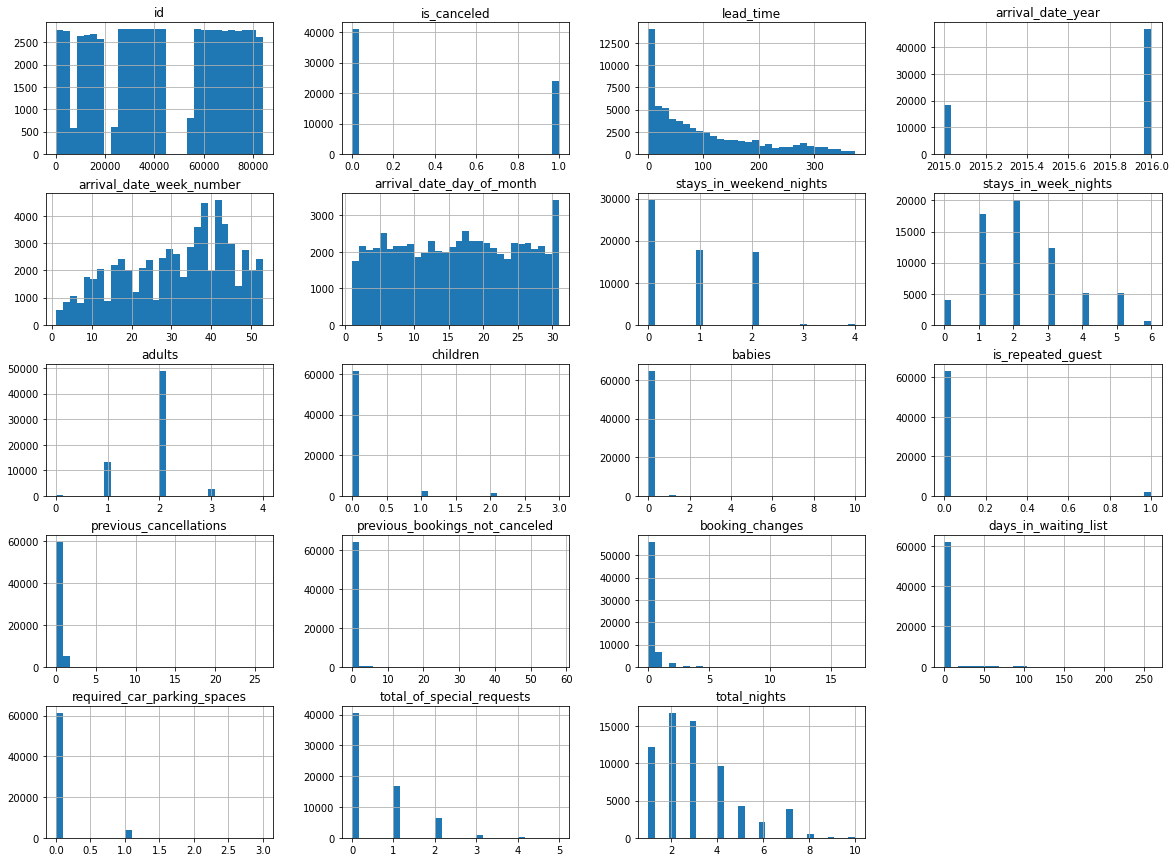

In [12]:
train.hist(bins=30, figsize=(20, 15))

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'is_canceled'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_year'}>],
       [<AxesSubplot:title={'center':'arrival_date_week_number'}>,
        <AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>,
        <AxesSubplot:title={'center':'stays_in_week_nights'}>],
       [<AxesSubplot:title={'center':'adults'}>,
        <AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>,
        <AxesSubplot:title={'center':'is_repeated_guest'}>],
       [<AxesSubplot:title={'center':'previous_cancellations'}>,
        <AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'booking_changes'}>,
        <AxesSubplot:title={'center':'days_in_waiting_list'}>],
       [<AxesSubplot:title={'center':'required_car_pa

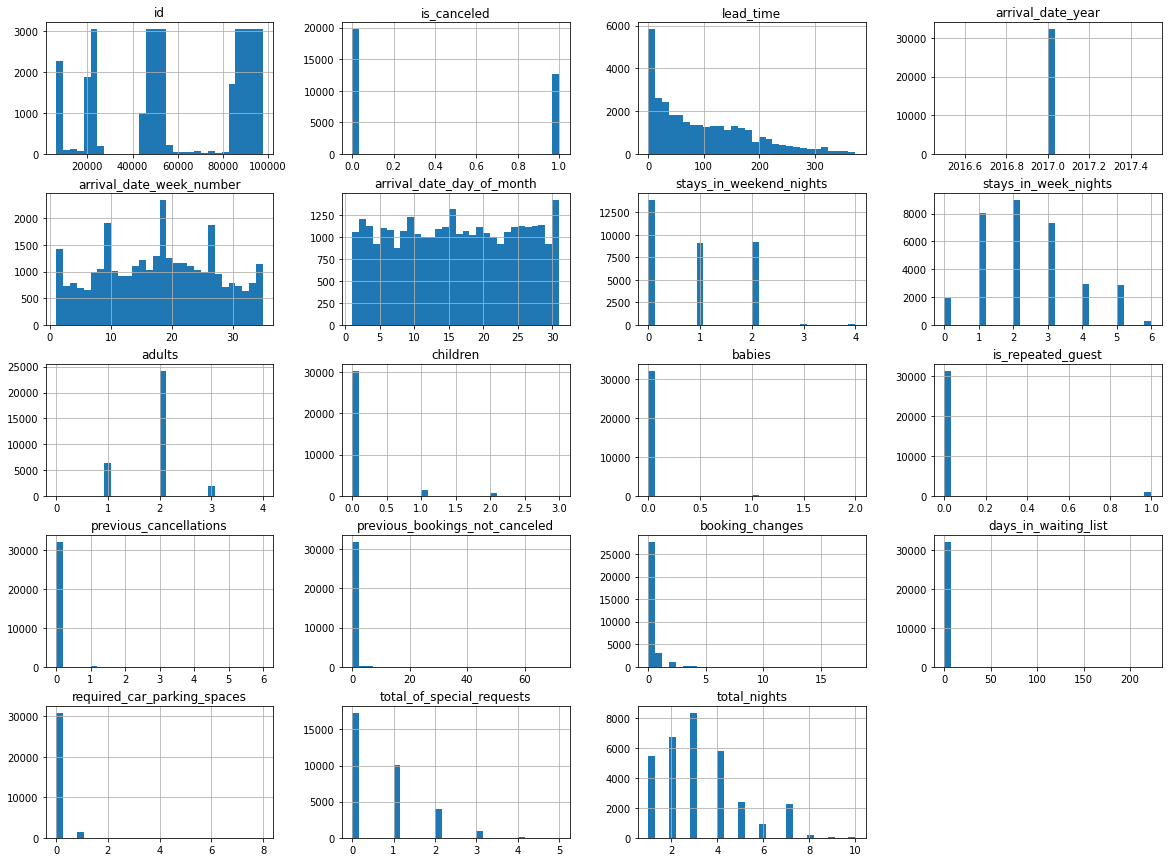

In [13]:
test.hist(bins=30, figsize=(20, 15))

**Посмотрим на значения некоторых признвков**

In [14]:
categorical_features = ['is_canceled', 'meal', 'country', 'distribution_channel', 
                        'is_repeated_guest', 'reserved_room_type', 'customer_type', 'arrival_date_month']

print(f'Unique values by features\n')

for feature in categorical_features:
    unique_values = train[feature].unique()
    print(f'{feature}:\n {unique_values}\n')

Unique values by features

is_canceled:
 [0 1]

meal:
 ['BB       ' 'FB       ' 'HB       ' 'SC       ' 'SC']

country:
 ['GBR' 'PRT' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'USA' 'DEU' 'BEL' 'CHE' 'CN'
 'GRC' 'NLD' 'ARG' 'RUS' 'SWE' 'POL' 'EST' 'CZE' 'ITA' 'FIN' 'DNK' 'MOZ'
 'BWA' 'LUX' 'BRA' 'SVN' 'ALB' 'CHN' 'MEX' 'MAR' 'SMR' 'LVA' 'CHL' 'AUT'
 'LTU' 'TUR' 'ISR' 'IND' 'CYM' 'AUS' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN'
 'TUN' 'ARE' 'HRV' 'HKG' 'IRN' 'GIB' 'JEY' 'URY' 'ZAF' 'COL' 'GGY' 'KWT'
 'CYP' 'KAZ' 'THA' 'DOM' 'NGA' 'BLR' 'VEN' 'UKR' 'ARM' 'JPN' 'LKA' 'MYS'
 'BIH' 'MUS' 'OMN' 'SUR' 'JAM' 'BGR' 'CIV' 'SRB' 'JOR' 'SYR' 'PHL' 'PRI'
 'SGP' 'BDI' 'LBN' 'AGO' 'VNM' 'AZE' 'PLW' 'NZL' 'EGY' 'MDV' 'CMR' 'MLT'
 'SVK' 'MWI' 'STP' 'TWN' 'IDN' 'SEN' 'PER' 'SAU' 'KNA' 'ETH' 'ECU' 'IRQ'
 'AND' 'HND' 'PAK' 'GEO' 'ZMB' 'QAT' 'KHM' 'MCO' 'BGD' 'ISL' 'UZB' 'IMN'
 'TJK' 'NIC' 'BEN' 'MAC' 'VGB' 'TZA' 'GAB' 'MKD' 'TMP' 'GLP' 'KEN' 'LIE'
 'MMR' 'PAN' 'BFA' 'LBY' 'GNB' 'MLI' 'BHR' 'NAM' 'BOL' 'SYC' 'PRY' 'BRB'
 'AB

В двух колонках (reserved_room_type и meal) видим лишние пробелы, удалим их

In [15]:
train['reserved_room_type'] = train['reserved_room_type'].str.replace(' ','')
train['meal'] = train['meal'].str.replace(' ','')

# проверим
train['reserved_room_type'].unique()
train['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [16]:
test['reserved_room_type'] = test['reserved_room_type'].str.replace(' ','')
test['meal'] = test['meal'].str.replace(' ','')

# проверим
test['reserved_room_type'].unique()
test['meal'].unique()

array(['BB', 'HB', 'SC', 'FB'], dtype=object)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              65229 non-null  int64 
 1   is_canceled                     65229 non-null  int64 
 2   lead_time                       65229 non-null  int64 
 3   arrival_date_year               65229 non-null  int64 
 4   arrival_date_month              65229 non-null  object
 5   arrival_date_week_number        65229 non-null  int64 
 6   arrival_date_day_of_month       65229 non-null  int64 
 7   stays_in_weekend_nights         65229 non-null  int64 
 8   stays_in_week_nights            65229 non-null  int64 
 9   adults                          65229 non-null  int64 
 10  children                        65229 non-null  int64 
 11  babies                          65229 non-null  int64 
 12  meal                            65229 non-null

**Есть данные, в которых adults = 0, необходимо проверить. Так как количество взрослых гостей не может быть равно 0, так бронирование производится взрослыми людьми, предполагаем, что это некоректные данные требующие удаления**

In [18]:
train.drop(train[train['adults'] == 0].index, inplace = True)
test.drop(test[test['adults'] == 0].index, inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65063 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              65063 non-null  int64 
 1   is_canceled                     65063 non-null  int64 
 2   lead_time                       65063 non-null  int64 
 3   arrival_date_year               65063 non-null  int64 
 4   arrival_date_month              65063 non-null  object
 5   arrival_date_week_number        65063 non-null  int64 
 6   arrival_date_day_of_month       65063 non-null  int64 
 7   stays_in_weekend_nights         65063 non-null  int64 
 8   stays_in_week_nights            65063 non-null  int64 
 9   adults                          65063 non-null  int64 
 10  children                        65063 non-null  int64 
 11  babies                          65063 non-null  int64 
 12  meal                            65063 non-null

**Посмотрим на проценты отмененных заказов**

In [19]:
train['is_canceled'].value_counts(normalize=True)

0    0.631188
1    0.368812
Name: is_canceled, dtype: float64

Примерно 37% заказов были отменены в датасете train

In [20]:
test['is_canceled'].value_counts(normalize=True)

0    0.611662
1    0.388338
Name: is_canceled, dtype: float64

Примерно 39% заказов были отменены в датасете test. Очень похоже

**Проверим есть ли некорректные данные, а именно total_nights = 0 и total_nights не равные сумме stays_in_weekend_nights и stays_in_week_nights**

In [21]:
print('Некорректных значений в датасете train:', 
      len(train[train['total_nights'] == 0]), 'шт.')
print('Некорректных значений в датасете train:', 
      len(train[train['total_nights'] != (train['stays_in_weekend_nights'] + train['stays_in_week_nights'])]), 'шт.')

Некорректных значений в датасете train: 0 шт.
Некорректных значений в датасете train: 0 шт.


**Удалим не влияющие на принятие решения отмены заказа - столбец id**

In [22]:
train = train.drop(['id'], axis=1)

# проверим удаление на общей информации о данных
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65063 entries, 0 to 65228
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   is_canceled                     65063 non-null  int64 
 1   lead_time                       65063 non-null  int64 
 2   arrival_date_year               65063 non-null  int64 
 3   arrival_date_month              65063 non-null  object
 4   arrival_date_week_number        65063 non-null  int64 
 5   arrival_date_day_of_month       65063 non-null  int64 
 6   stays_in_weekend_nights         65063 non-null  int64 
 7   stays_in_week_nights            65063 non-null  int64 
 8   adults                          65063 non-null  int64 
 9   children                        65063 non-null  int64 
 10  babies                          65063 non-null  int64 
 11  meal                            65063 non-null  object
 12  country                         65063 non-null

In [23]:
test = test.drop(['id'], axis=1)

# проверим удаление на общей информации о данных
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32343 entries, 0 to 32411
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   is_canceled                     32343 non-null  int64 
 1   lead_time                       32343 non-null  int64 
 2   arrival_date_year               32343 non-null  int64 
 3   arrival_date_month              32343 non-null  object
 4   arrival_date_week_number        32343 non-null  int64 
 5   arrival_date_day_of_month       32343 non-null  int64 
 6   stays_in_weekend_nights         32343 non-null  int64 
 7   stays_in_week_nights            32343 non-null  int64 
 8   adults                          32343 non-null  int64 
 9   children                        32343 non-null  int64 
 10  babies                          32343 non-null  int64 
 11  meal                            32343 non-null  object
 12  country                         32343 non-null

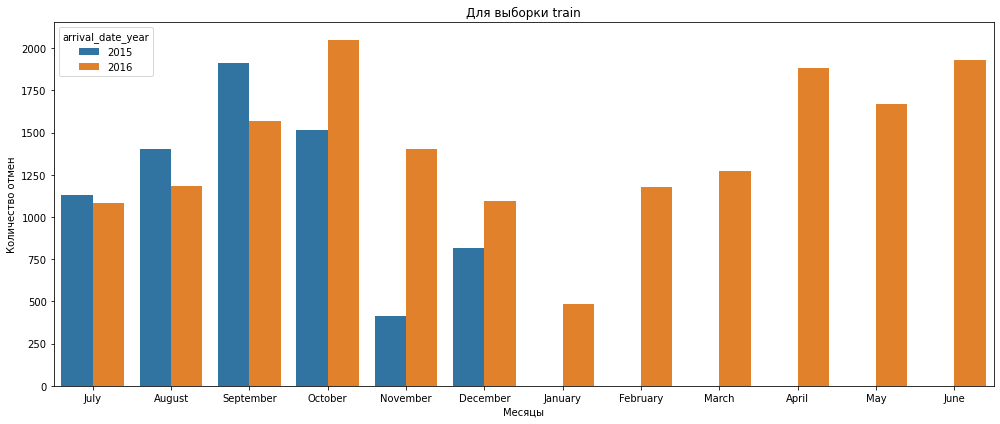

In [24]:
confirmed_bookings_train = train[train['is_canceled'] == 0]
canceled_bookings_train = train[train['is_canceled'] == 1]

# yайдем месяц с наибольшим количеством подтвержденных бронирований в датасете train
plt.figure(figsize = (14, 6))

sns.countplot(x = 'arrival_date_month', 
            data = canceled_bookings_train, 
            hue = 'arrival_date_year', 
            )
plt.title('Для выборки train', )
plt.xlabel('Месяцы')
plt.ylabel('Количество отмен')

plt.tight_layout()

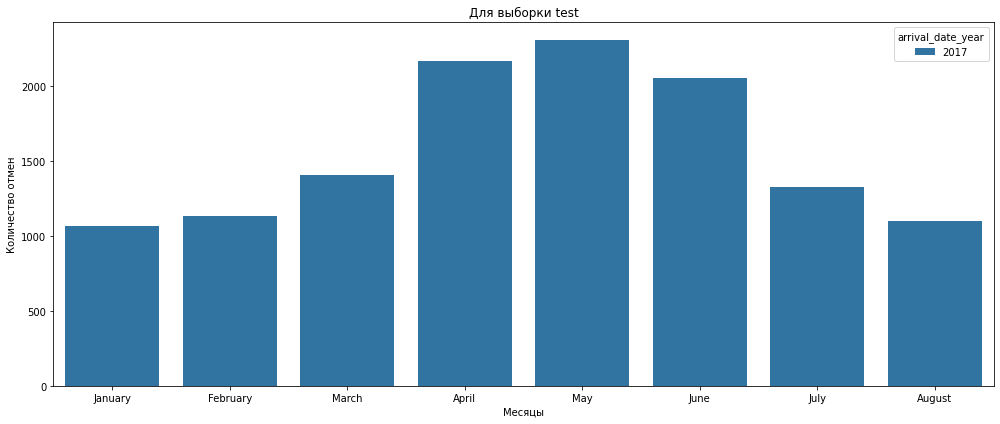

In [25]:
confirmed_bookings_test = test[test['is_canceled'] == 0]
canceled_bookings_test = test[test['is_canceled'] == 1]

# yайдем месяц с наибольшим количеством подтвержденных бронирований в датасете test
plt.figure(figsize = (14, 6))

sns.countplot(x = 'arrival_date_month', 
            data = canceled_bookings_test, 
            hue = 'arrival_date_year', 
            )
plt.title('Для выборки test', )
plt.xlabel('Месяцы')
plt.ylabel('Количество отмен')

plt.tight_layout()

- В выборке train: Видим, что за 2015 год данных меньше чем за 2016. Больше всего дней было отменено в октябре 2016.
- В выборке test: Видим что есть данные только за 2017 год. Больше всего номеров было отменено с апреля по июнь.

**Посмотрим с какой длительностью прибывания обычно отменяют брони номеров**

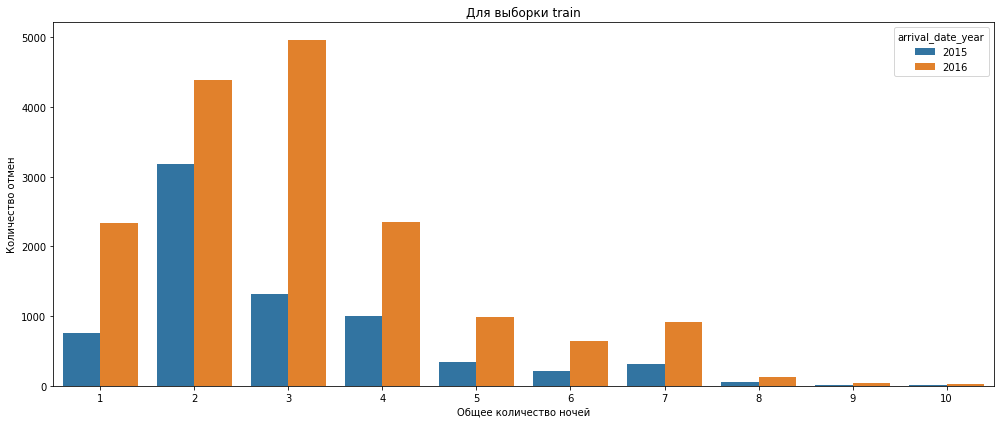

In [26]:
# в датасете train
plt.figure(figsize = (14, 6))

ax = sns.countplot(x = 'total_nights', 
                data = canceled_bookings_train, 
                hue = 'arrival_date_year')
plt.title('Для выборки train')
plt.xlabel('Общее количество ночей')
plt.ylabel('Количество отмен')

plt.tight_layout()

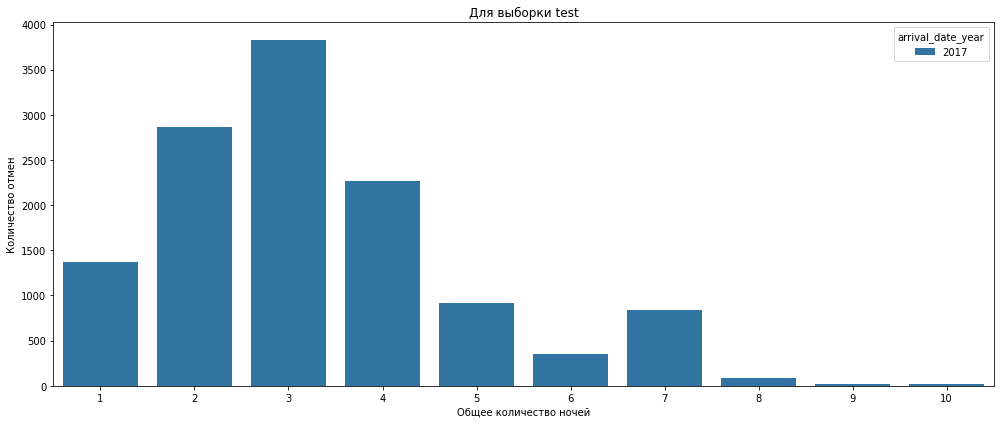

In [27]:
# в датасете test
plt.figure(figsize = (14, 6))

ax = sns.countplot(x = 'total_nights', 
                data = canceled_bookings_test, 
                hue = 'arrival_date_year')
plt.title('Для выборки test')
plt.xlabel('Общее количество ночей')
plt.ylabel('Количество отмен')

plt.tight_layout()

- В выборке train: Видим, что больше всего отменяли номера в 2016 году, которые были забронированы на 3 суток, а в 2015 на 2 суток.
- В выборке test: Видим что больше всего отменяли номера в 2017 году, которые были забронированы на 3 суток.

**Посмотрим на графике из граждане какой страны больше всего отменяют бронь номера. Топ 20**

Text(0, 0.5, 'Количество отмен')

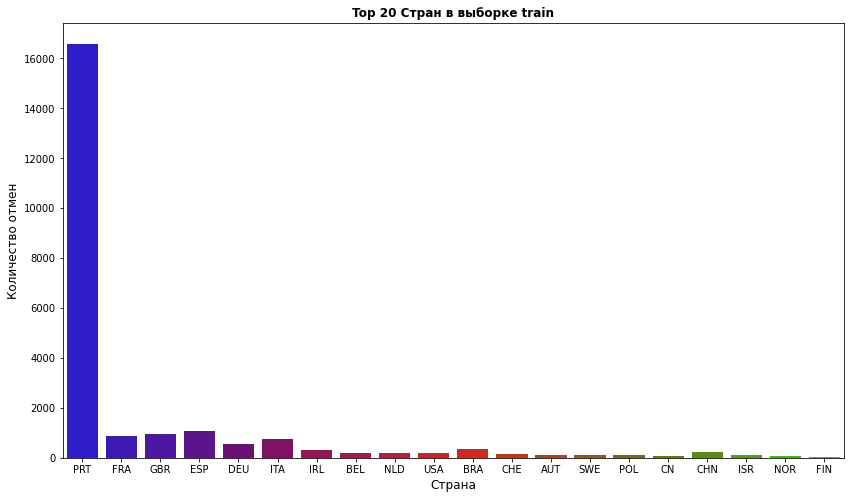

In [28]:
# в датасете train
ffig, ax = plt.subplots(figsize = (14, 8))
sns.countplot(ax = ax,
            x='country', 
            data=canceled_bookings_train, 
            order=pd.value_counts(confirmed_bookings_train['country']).iloc[:20].index,
            palette = 'brg')

plt.title('Top 20 Стран в выборке train', weight='bold')
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество отмен', fontsize=12)

Text(0, 0.5, 'Количество отмен')

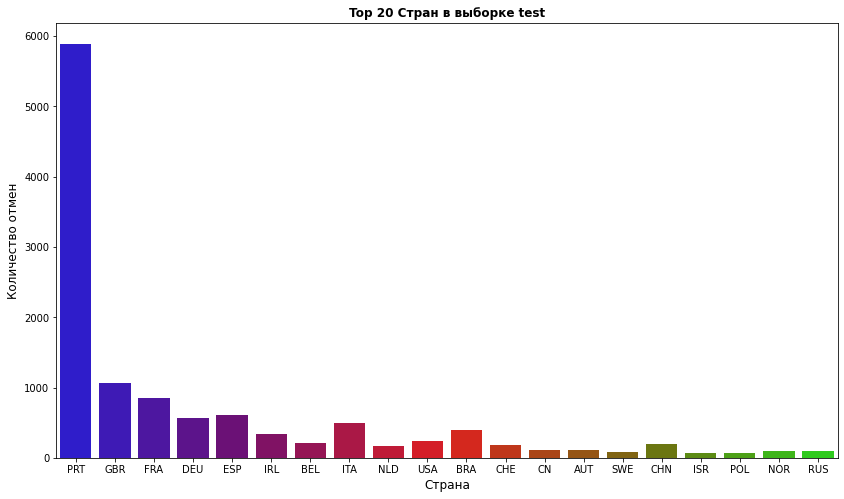

In [29]:
# в датасете test
ffig, ax = plt.subplots(figsize = (14, 8))
sns.countplot(ax = ax,
            x='country', 
            data=canceled_bookings_test, 
            order=pd.value_counts(confirmed_bookings_test['country']).iloc[:20].index,
            palette = 'brg')

plt.title('Top 20 Стран в выборке test', weight='bold')
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество отмен', fontsize=12)

Первое место в рейтинге стран, граждане которых отменяют бронь, занимает PRT Португалия. Видимо отель находится там.

**Посмотрим кто чаще отменяет бронь, новые клиенты или старые**

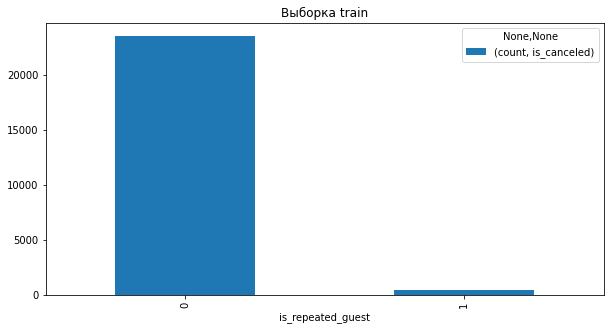

In [30]:
# в датасете train
train.query('is_canceled > 0').pivot_table(index = 'is_repeated_guest', values = 'is_canceled', 
                                            aggfunc = ['count']).plot(kind = 'bar', figsize = (10,5), title= 'Выборка train');

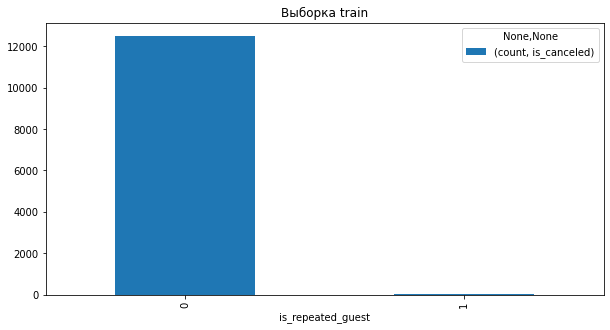

In [31]:
# в датасете test
test.query('is_canceled > 0').pivot_table(index = 'is_repeated_guest', values = 'is_canceled', 
                                            aggfunc = ['count']).plot(kind = 'bar', figsize = (10,5), title= 'Выборка train');

Чаще отменяют бронь новые клиенты.

**Посмотрим по какому каналу дистрибуции заказа (distribution_channel) больше всего отмен**

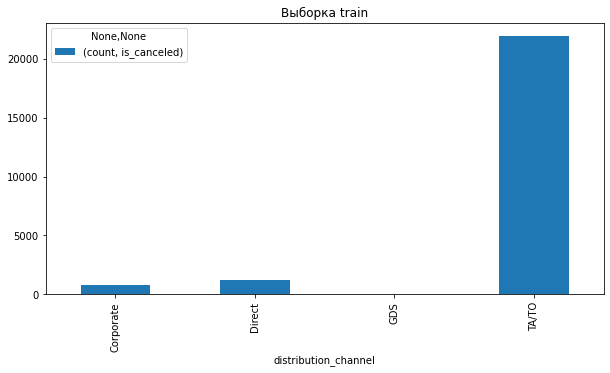

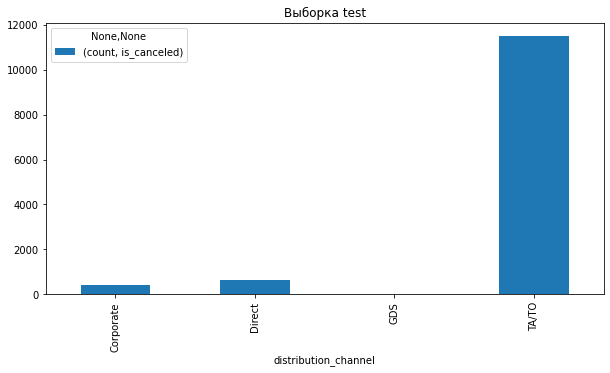

In [32]:
# построим график типа bar для train
train.query('is_canceled > 0').pivot_table(index = 'distribution_channel', values = 'is_canceled', 
                                            aggfunc = ['count']).plot(kind = 'bar', figsize = (10,5), title= 'Выборка train');
# построим график типа bar для test
test.query('is_canceled > 0').pivot_table(index = 'distribution_channel', values = 'is_canceled', 
                                           aggfunc = ['count']).plot(kind = 'bar', figsize = (10,5), title= 'Выборка test');

Больше всего отмен по каналу дистрибуции заказа TA/To

**Посмотри как влияет previous_cancellations — количество отменённых заказов у клиента на количество отказов в целом**

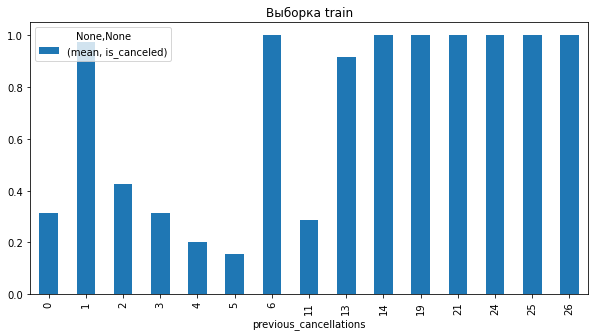

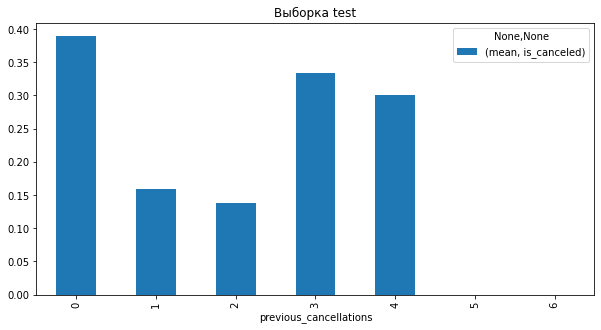

In [33]:
# построим график типа bar для train
train.pivot_table(index = 'previous_cancellations', values = 'is_canceled', 
                                            aggfunc = ['mean']).plot(kind = 'bar', figsize = (10,5), title= 'Выборка train');
# построим график типа bar для test
test.pivot_table(index = 'previous_cancellations', values = 'is_canceled', 
                                           aggfunc = ['mean']).plot(kind = 'bar', figsize = (10,5), title= 'Выборка test');

В выборке train отслеживается тенденция - если у человека много отмененных заказов, то скорее всего он отменит эту бронь.

**Посмотрим с каким питанием больше всего отмен**

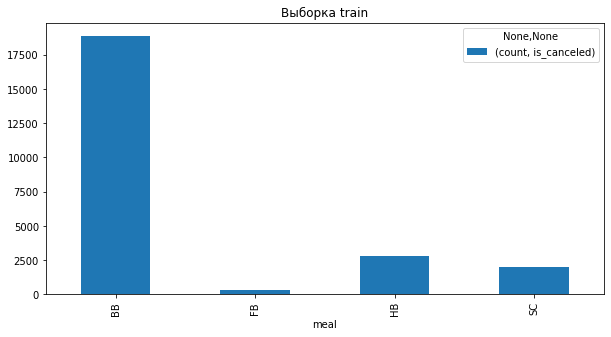

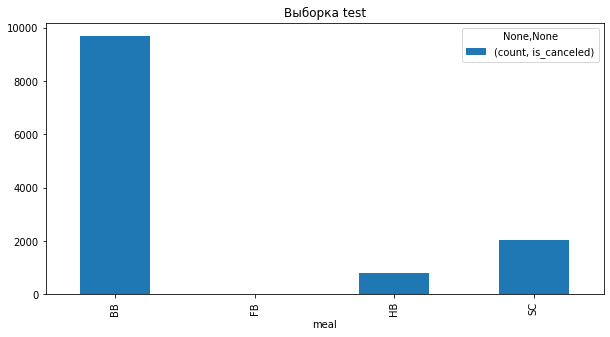

In [34]:
# построим график типа bar для train
train.query('is_canceled > 0').pivot_table(index = 'meal', values = 'is_canceled', 
                                            aggfunc = ['count']).plot(kind = 'bar', figsize = (10,5), title= 'Выборка train');
# построим график типа bar для test
test.query('is_canceled > 0').pivot_table(index = 'meal', values = 'is_canceled', 
                                           aggfunc = ['count']).plot(kind = 'bar', figsize = (10,5), title= 'Выборка test');

Больше всего отмен с питанием ВВ - завтрак включен

**Посмотрим номера с какимим категориями больше всего отменяют**

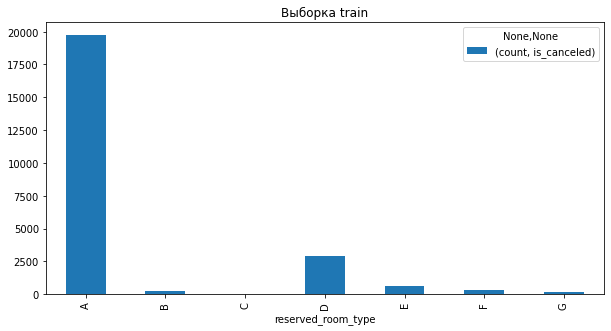

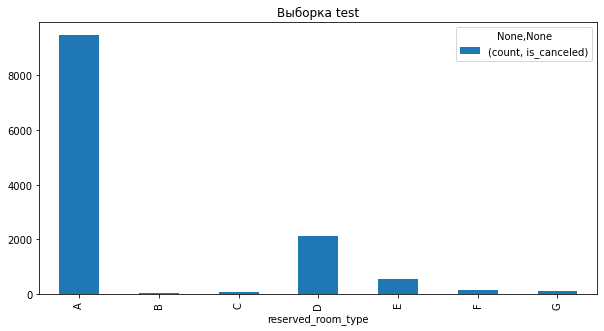

In [35]:
# построим график типа bar для train
train.query('is_canceled > 0').pivot_table(index = 'reserved_room_type', values = 'is_canceled', 
                                            aggfunc = ['count']).plot(kind = 'bar', figsize = (10,5), title= 'Выборка train');
# построим график типа bar для test
test.query('is_canceled > 0').pivot_table(index = 'reserved_room_type', values = 'is_canceled', 
                                           aggfunc = ['count']).plot(kind = 'bar', figsize = (10,5), title= 'Выборка test');

Больше всего отменяют номера с категориеей А

**Посмотрим сколько номеров отменено с необходимостью места для автомобиля**

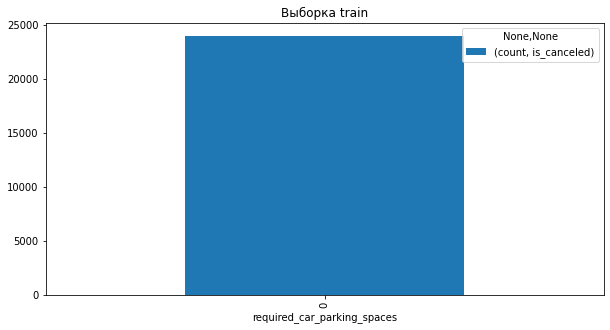

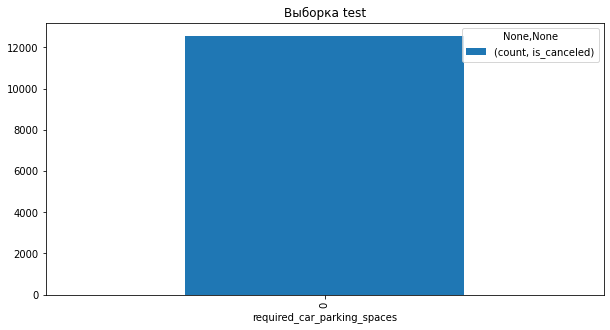

In [36]:
# построим график типа bar для train
train.query('is_canceled > 0').pivot_table(index = 'required_car_parking_spaces', values = 'is_canceled', 
                                            aggfunc = ['count']).plot(kind = 'bar', figsize = (10,5), title= 'Выборка train');
# построим график типа bar для test
test.query('is_canceled > 0').pivot_table(index = 'required_car_parking_spaces', values = 'is_canceled', 
                                           aggfunc = ['count']).plot(kind = 'bar', figsize = (10,5), title= 'Выборка test');

У всех отмененных номеров не было необходимости места для автомобиля

**Посмотрим с каким количеством специальных отметок чаще всего отменяют номера**

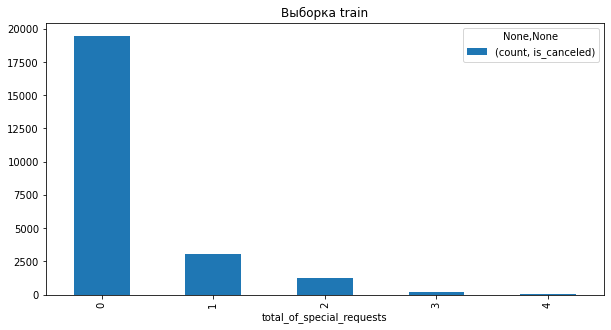

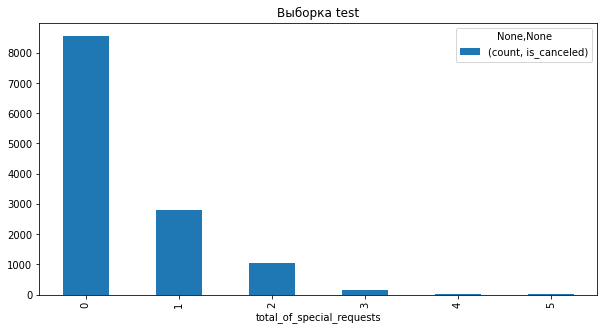

In [37]:
# построим график типа bar для train
train.query('is_canceled > 0').pivot_table(index = 'total_of_special_requests', values = 'is_canceled', 
                                            aggfunc = ['count']).plot(kind = 'bar', figsize = (10,5), title= 'Выборка train');
# построим график типа bar для test
test.query('is_canceled > 0').pivot_table(index = 'total_of_special_requests', values = 'is_canceled', 
                                           aggfunc = ['count']).plot(kind = 'bar', figsize = (10,5), title= 'Выборка test');

Обычно отменяют номера без отметок

**Выводы по одоим датасетам:**
- Данные соответствуют описанию
- Есть как количественные, так и качественные признаки
- Пропуски отсутствуют
- Типы данных откорректированы
- Распределения некоторых признаков отличаются от нормального
- Также присутствуют большие выбросы
- Масштабы распределений отдельных признаков сильно отличаются друг от друга (более одного порядка). Отобранные признаки будут нуждаться в масштабировании

**Проверим на наличие дубликатов**

In [38]:
print('В выборке train дубликатов:', train.duplicated().sum())
print('В выборке test дубликатов:', test.duplicated().sum())

В выборке train дубликатов: 21375
В выборке test дубликатов: 7713


Удалим дубликаты

In [39]:
train = train.drop_duplicates(keep='first')
len(train)

43688

In [40]:
test = test.drop_duplicates(keep='first')
len(test)

24630

### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

#### Немного теории

Нужно разработать систему, которая предсказывает **отказ от брони**. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит (80% от стоимости номера за одни сутки и затрат на разовую уборку).

Основная бизнес-метрика для любой сети отелей — её **прибыль**.

    Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера,    так и при проживании постояльца.

**Убытки отеля в случае отмены брони номера — это стоимость одной уборки и одной ночи с учётом сезонного коэффициента.**

Сезонные коэффициенты:
- *весной* и *осенью* цены повышаются на 20%, 
- *летом* — на 40%.

Стоимость номеров отеля:
- категория A: за ночь — 1 000, разовое обслуживание — 400;
- категория B: за ночь — 800, разовое обслуживание — 350;
- категория C: за ночь — 600, разовое обслуживание — 350;
- категория D: за ночь — 550, разовое обслуживание — 150;
- категория E: за ночь — 500, разовое обслуживание — 150;
- категория F: за ночь — 450, разовое обслуживание — 150;
- категория G: за ночь — 350, разовое обслуживание — 150.

#### Посчитаем прибыль

In [41]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [42]:
# напишем функцию для расчета прибыли
def profit (data):
    '''
    description: Функция расчитывает прибыль отеля
    input:       data — датасет
    output:      profit — прибыль отеля
    
    Сезонные коэффициенты:
    весной и осенью цены повышаются на 20%,
    летом — на 40%.
    
    Стоимость номеров отеля:
    категория A: за ночь — 1 000, разовое обслуживание — 400;
    категория B: за ночь — 800, разовое обслуживание — 350;
    категория C: за ночь — 600, разовое обслуживание — 350;
    категория D: за ночь — 550, разовое обслуживание — 150;
    категория E: за ночь — 500, разовое обслуживание — 150;
    категория F: за ночь — 450, разовое обслуживание — 150;
    категория G: за ночь — 350, разовое обслуживание — 150.      
    '''
    profit = []
    
    for i in range(len(data)):
        
        arrival_date_month = data.loc[i, 'arrival_date_month']
        reserved_room_type = data.loc[i, 'reserved_room_type']
        total_nights = data.loc[i, 'total_nights']
        is_canceled = data.loc[i, 'is_canceled']
        
        if is_canceled == 0:
           
            if arrival_date_month == 'June':
                seasonal_odds = 1.4
            elif arrival_date_month == 'July':
                seasonal_odds = 1.4
            elif arrival_date_month == 'August':
                seasonal_odds = 1.4
            elif arrival_date_month == 'March':
                seasonal_odds = 1.2
            elif arrival_date_month == 'April':
                seasonal_odds = 1.2
            elif arrival_date_month == 'May':
                seasonal_odds = 1.2
            elif arrival_date_month == 'September':
                seasonal_odds = 1.2
            elif arrival_date_month == 'October':
                seasonal_odds = 1.2
            elif arrival_date_month == 'November':
                seasonal_odds = 1.2
            else:
                seasonal_odds = 1

            price = 0
            service = 0
            if reserved_room_type == 'A':
                price = 1000
                service = 400
            elif reserved_room_type == 'B':
                price = 800
                service = 350
            elif reserved_room_type == 'C':
                price = 600
                service = 350
            elif reserved_room_type == 'D':
                price = 550
                service = 150
            elif reserved_room_type == 'E':
                price = 500
                service = 150
            elif reserved_room_type == 'F':
                price = 450
                service = 150
            elif reserved_room_type == 'G':
                price = 350
                service = 150

            profit.append((price - service) * total_nights * seasonal_odds)
        else:
            profit.append(0)
            
    return profit

In [43]:
train['profit'] = profit(train)
train.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,profit
0,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,0,0,0,A,0,0,Transient,0,0,1,840.0
1,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,1,2,1680.0
2,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,0,0,0,C,0,0,Transient,0,0,2,700.0
3,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,0,0,0,C,0,0,Transient,0,1,2,700.0
4,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,3,0.0


In [44]:
# напишем функцию, которая расчитывает убытки отеля в случае отмены брони
def losses (data):
    '''
    description: Функция расчитывает убытки отеля в случае отмены брони и депозит клиента за номер
    input:       data — датасет
    output:      losses — убытки отеля
                 deposit — депозит клиента за номер
    
    Сезонные коэффициенты:
    весной и осенью цены повышаются на 20%,
    летом — на 40%.
    
    Стоимость номеров отеля:
    категория A: за ночь — 1 000, разовое обслуживание — 400;
    категория B: за ночь — 800, разовое обслуживание — 350;
    категория C: за ночь — 600, разовое обслуживание — 350;
    категория D: за ночь — 550, разовое обслуживание — 150;
    категория E: за ночь — 500, разовое обслуживание — 150;
    категория F: за ночь — 450, разовое обслуживание — 150;
    категория G: за ночь — 350, разовое обслуживание — 150.      
    '''
    losses = []
    
    for i in range(len(data)):
        
        arrival_date_month = data.loc[i, 'arrival_date_month']
        reserved_room_type = data.loc[i, 'reserved_room_type']
        is_canceled = data.loc[i, 'is_canceled']
        
        if is_canceled == 1:
           
            if arrival_date_month == 'June':
                seasonal_odds = 1.4
            elif arrival_date_month == 'July':
                seasonal_odds = 1.4
            elif arrival_date_month == 'August':
                seasonal_odds = 1.4
            elif arrival_date_month == 'March':
                seasonal_odds = 1.2
            elif arrival_date_month == 'April':
                seasonal_odds = 1.2
            elif arrival_date_month == 'May':
                seasonal_odds = 1.2
            elif arrival_date_month == 'September':
                seasonal_odds = 1.2
            elif arrival_date_month == 'October':
                seasonal_odds = 1.2
            elif arrival_date_month == 'November':
                seasonal_odds = 1.2
            else:
                seasonal_odds = 1

            price = 0
            service = 0
            if reserved_room_type == 'A':
                price = 1000
                service = 400
            elif reserved_room_type == 'B':
                price = 800
                service = 350
            elif reserved_room_type == 'C':
                price = 600
                service = 350
            elif reserved_room_type == 'D':
                price = 550
                service = 150
            elif reserved_room_type == 'E':
                price = 500
                service = 150
            elif reserved_room_type == 'F':
                price = 450
                service = 150
            elif reserved_room_type == 'G':
                price = 350
                service = 150
    
            losses.append((price - service) * seasonal_odds)
        else:
            losses.append(0)
    return losses

**Добавим данные столбцы в датафрейс test**

In [45]:
test['profit'] = profit(test)
test.tail()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,profit
24625,0,164,2017,August,35,31,2,4,2,0,0,BB,DEU,TA/TO,0,0,0,A,0,0,Transient,0,0,6,5040.0
24626,0,21,2017,August,35,30,2,5,2,0,0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,2,7,5880.0
24627,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7,5880.0
24628,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,TA/TO,0,0,0,D,0,0,Transient,0,4,7,3920.0
24629,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,0,7,5880.0


### Шаг 4. Разработка модели ML

#### Отбор признаков

**Не все признаки подойдут для обучения модели. Отберём те, которые больше всего коррелируют с признаком is_canceled**

In [46]:
train.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'days_in_waiting_list', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_nights', 'profit'],
      dtype='object')

In [47]:
train_corr = train[['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
                'arrival_date_week_number', 'arrival_date_day_of_month', 
                'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
                'babies', 'days_in_waiting_list', 'total_of_special_requests', 'total_nights', 'profit']]

train_corr.corr()['is_canceled'].abs().sort_values(ascending=False)

is_canceled                  1.000000
profit                       0.616521
lead_time                    0.176361
total_of_special_requests    0.134069
total_nights                 0.069456
stays_in_week_nights         0.067955
adults                       0.067302
arrival_date_year            0.057767
children                     0.040762
stays_in_weekend_nights      0.036338
arrival_date_week_number     0.023652
arrival_date_day_of_month    0.017580
babies                       0.016826
days_in_waiting_list         0.002935
Name: is_canceled, dtype: float64

In [48]:
# выберем призаки, которые меньше всего коррелируют с признаком is_canceled и удалим 'profit', 
# так как он вычислен напрямую от is_canceled и по смыслу
columns_to_drop = ['profit', 'country']

Удалим выбранные признаки, так как они не будут полезны для построения модели.

In [49]:
train = train.drop(columns_to_drop, axis = 1)

In [50]:
test = test.drop(columns_to_drop, axis = 1)

In [51]:
# проверим что получилось
train.head().head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,7,2015,July,27,1,0,1,1,0,0,BB,Direct,0,0,0,A,0,0,Transient,0,0,1
1,0,14,2015,July,27,1,0,2,2,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,1,2
2,0,0,2015,July,27,1,0,2,2,0,0,BB,Direct,0,0,0,C,0,0,Transient,0,0,2
3,0,9,2015,July,27,1,0,2,2,0,0,FB,Direct,0,0,0,C,0,0,Transient,0,1,2
4,1,85,2015,July,27,1,0,3,2,0,0,BB,TA/TO,0,0,0,A,0,0,Transient,0,1,3


#### Разделим данные на признаки и целевой признак

In [52]:
target = train['is_canceled']
features = train.drop('is_canceled', axis=1)

In [53]:
target_test = test['is_canceled']
features_test = test.drop('is_canceled', axis=1)

In [54]:
features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                              target, 
                                                                              train_size=0.70, 
                                                                              test_size=0.30, 
                                                                              random_state=12345)

In [55]:
# проверим
print('Размер обучающей выбоки:', features_train.shape)
print('Размер валидационной выбоки:', features_valid.shape)
print('Размер тестовой выбоки:', features_test.shape)

Размер обучающей выбоки: (30581, 22)
Размер валидационной выбоки: (13107, 22)
Размер тестовой выбоки: (24630, 22)


**Преобразовать категориальные признаки в численные поможет техника прямого кодирования, или отображения (англ. One-Hot Encoding, OHE)**

In [56]:
categorical = ['arrival_date_month', 'meal', 'distribution_channel', 'reserved_room_type', 'customer_type']

ohe = OneHotEncoder(categories = 'auto', drop = "first")
ohe_train = pd.DataFrame(ohe.fit_transform(features_train[categorical]).toarray())

new_features_train = features_train.reset_index(drop=True)
ohe_features_train = new_features_train.join(ohe_train)
ohe_features_train.drop(categorical, axis=1, inplace=True)

In [57]:
#valid
ohe_valid = pd.DataFrame(ohe.transform(features_valid[categorical]).toarray())

new_features_valid = features_valid.reset_index(drop=True)
ohe_features_valid = new_features_valid.join(ohe_train)
ohe_features_valid.drop(categorical, axis=1, inplace=True)

In [58]:
#test
ohe_test = pd.DataFrame(ohe.transform(features_test[categorical]).toarray())

new_features_test = features_test.reset_index(drop=True)
ohe_features_test = new_features_test.join(ohe_train)
ohe_features_test.drop(categorical, axis=1, inplace=True)

#### Масштабирование численных признаков

In [59]:
# создадим объект этой структуры и настроим его на обучающих данных
numeric = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 
           'children', 'previous_cancellations', 'previous_bookings_not_canceled', 
           'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests',
           'total_nights', 'days_in_waiting_list', 'arrival_date_day_of_month', 
                   'babies', 'arrival_date_week_number', 'arrival_date_year']

scaler = StandardScaler()
scaler.fit(ohe_features_train[numeric]) 

StandardScaler()

In [60]:
ohe_features_train[numeric] = scaler.transform(ohe_features_train[numeric])
ohe_features_valid[numeric] = scaler.transform(ohe_features_valid[numeric])
ohe_features_test[numeric] = scaler.transform(ohe_features_test[numeric])

#### Борьба с дисбалансом

Для борьбы с дисбалансом применим взвешивание класснов. Укажем class_weight='balanced' (англ. «сбалансированный»), алгоритм посчитает, во сколько раз класс «0» встречается чаще класса «1». Бóльший вес будет у редкого класса.

In [61]:
new_target_train = target_train.reset_index(drop=True)
new_target_valid = target_valid.reset_index(drop=True)
new_target_test = target_test.reset_index(drop=True)

#### Обучиме разные модели и оценим их качество 

Для работы выберем метрику f1_score, так как у нас двоичная классификация. 

Полнота и точность оценивают качество прогноза положительного класса с разных позиций. Recall описывает, как хорошо модель разобралась в особенностях этого класса и распознала его. Precision выявляет, не переусердствует ли модель, присваивая положительные метки.
Важны обе метрики. Контролировать их параллельно помогает  F1-мера. Это среднее гармоническое полноты и точности.

In [ ]:
# решающее дерево
dtc = DecisionTreeClassifier(random_state=12345, class_weight='balanced')

param_grid = {'max_depth':range(2, 20), 'min_samples_split':range(2, 10), 'min_samples_leaf':range(2, 10)}
gscv_dtc = GridSearchCV(dtc, param_grid=param_grid, cv=5, scoring='f1')

gscv_dtc.fit(ohe_features_train, new_target_train)

gscv_dtc_f1 = f1_score(new_target_valid, gscv_dtc.predict(ohe_features_valid))

print('f1_score =', gscv_dtc_f1)
print(gscv_dtc.best_estimator_)

In [ ]:
# случайный лес
rfc = RandomForestClassifier(random_state=12345, class_weight='balanced')

param_grid = {'n_estimators':range(10, 100, 10), 'max_depth':range(2, 20)}
gscv_rfc = GridSearchCV(rfc, param_grid=param_grid, cv=5, scoring='f1')

gscv_rfc.fit(ohe_features_train, new_target_train)

gscv_rfc_f1 = f1_score(new_target_valid, gscv_rfc.predict(ohe_features_valid))

print('f1_score =', gscv_rfc_f1)
print(gscv_rfc.best_estimator_)

In [ ]:
# логистическая регрессия
lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
gscv_lr = GridSearchCV(lr, param_grid=param_grid, cv=5, scoring='f1')

gscv_lr.fit(ohe_features_train, new_target_train)

gscv_lr_f1 = f1_score(new_target_valid, gscv_lr.predict(ohe_features_valid))

print('f1_score =', gscv_lr_f1)
print(gscv_lr.best_estimator_)

Лучшая модель получилась **Случайный лес**. Для дальнейших работ примем именно эту модель

In [ ]:
# случайный лес
dtc = DecisionTreeClassifier(class_weight='balanced', max_depth=13, min_samples_leaf=9, random_state=12345)
dtc.fit(ohe_features_train, new_target_train)

dtc_accuracy = accuracy_score(new_target_valid, dtc.predict(ohe_features_valid))
dtc_f1 = f1_score(new_target_valid, dtc.predict(ohe_features_valid))

print('Accuracy =', dtc_accuracy)
print('f1_score =', dtc_f1)

Протестируем ее на testовой выборке

In [ ]:
# f1-мера
f1 = f1_score(new_target_test, dtc.predict(ohe_features_test))

print('f1_score случайного леса:', f1)

Значение f1_score случайного леса: 0.5689847526961695 получилось хорошее, оставим эту модель.

#### Оценим прибыль, которую принесёт выбранная модель за год

In [ ]:
# напишем функцию, которая расчитывает депозит в случае, если модель предскажет что скорее всего номер отменят 
def deposit (data):
    '''
    description: Функция расчитывает убытки отеля в случае отмены брони и депозит клиента за номер
    input:       data — датасет
    output:      deposit — депозит клиента за номер
    
    Сезонные коэффициенты:
    весной и осенью цены повышаются на 20%,
    летом — на 40%.
    
    Стоимость номеров отеля:
    категория A: за ночь — 1 000, разовое обслуживание — 400;
    категория B: за ночь — 800, разовое обслуживание — 350;
    категория C: за ночь — 600, разовое обслуживание — 350;
    категория D: за ночь — 550, разовое обслуживание — 150;
    категория E: за ночь — 500, разовое обслуживание — 150;
    категория F: за ночь — 450, разовое обслуживание — 150;
    категория G: за ночь — 350, разовое обслуживание — 150.      
    '''
    deposit = []
    
    for i in range(len(data)):
        
        arrival_date_month = data.loc[i, 'arrival_date_month']
        reserved_room_type = data.loc[i, 'reserved_room_type']
        predict = data.loc[i, 'predict']
        
        if predict == 1:
           
            if arrival_date_month == 'June':
                seasonal_odds = 1.4
            elif arrival_date_month == 'July':
                seasonal_odds = 1.4
            elif arrival_date_month == 'August':
                seasonal_odds = 1.4
            elif arrival_date_month == 'March':
                seasonal_odds = 1.2
            elif arrival_date_month == 'April':
                seasonal_odds = 1.2
            elif arrival_date_month == 'May':
                seasonal_odds = 1.2
            elif arrival_date_month == 'September':
                seasonal_odds = 1.2
            elif arrival_date_month == 'October':
                seasonal_odds = 1.2
            elif arrival_date_month == 'November':
                seasonal_odds = 1.2
            else:
                seasonal_odds = 1

            price = 0
            service = 0
            if reserved_room_type == 'A':
                price = 1000
                service = 400
            elif reserved_room_type == 'B':
                price = 800
                service = 350
            elif reserved_room_type == 'C':
                price = 600
                service = 350
            elif reserved_room_type == 'D':
                price = 550
                service = 150
            elif reserved_room_type == 'E':
                price = 500
                service = 150
            elif reserved_room_type == 'F':
                price = 450
                service = 150
            elif reserved_room_type == 'G':
                price = 350
                service = 150
    
            deposit.append((price - service) * seasonal_odds * 0.8)
        else:
            deposit.append(0)
    return deposit

In [ ]:
predict = dtc.predict(ohe_features_test)
predict = pd.Series(*dtc.predict(ohe_features_test).reshape(1,-1))
test['predict'] = predict

In [ ]:
test['deposit'] = deposit(test)
print('Данная модель окупится за года -', test['deposit'].sum() > 400000)

In [ ]:
test['deposit'].sum()

### Шаг 5. Опишите портрет «ненадёжного» клиента

На основе исследовательского анализа данных клиент, склонного к отказу от брони Получился такой:
- он из Португалии
- бронирует номер первый раз (новый клиент) или с большим количеством отмененных заказов
- из канала дистрибуции ТА/ТО
- бронирует номер на 3 ночи
- бронирует номер класса А
- с питанием ВВ - завтраки включены
- бронирует номер в апреле, июне или октябре
- без специальных отметок
- и без автомобиля
    

### Шаг 6. Напишите общий вывод

В проекте было выполнено:
- проанализированы 2 датасета
- найдены ненужные пробелы в данных
- поменены типы данных
- построены графики зависимости отмены брони от остальных параметров
- написана функция прибыли
- проанализированы 3 потенциальные модели
- найдена лучшая модель
- обучена модель
- предсказана прибыль отеля за год после внедрения этой модели
- прибыль оказалась больше 400 000 (по заданию)
- найден портрет «ненадёжного» клиента